In [1]:
#step1- importing required libraries

In [2]:
import pandas as pd #for data analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#step2- read the data using pandas

In [4]:
#absolute path
df=pd.read_csv("C:\\Users\\lenovo\\Desktop\\Summer internship\\data science\\titanic.csv")

In [5]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
#relative path--> 
df=pd.read_csv("titanic.csv")

In [6]:
df.shape

(891, 12)

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Taylor, Mr. Elmer Zebley",male,347082,B96 B98,S
freq,1,577,7,4,644


### Data Visualization:
#### Building the Model:
#### Using Logistic Regression


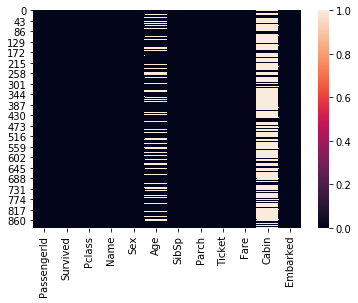

In [14]:
#visualizing the missing values
sns.heatmap(df.isna())

In [15]:
import sys
!{sys.executable} -m pip install missingno

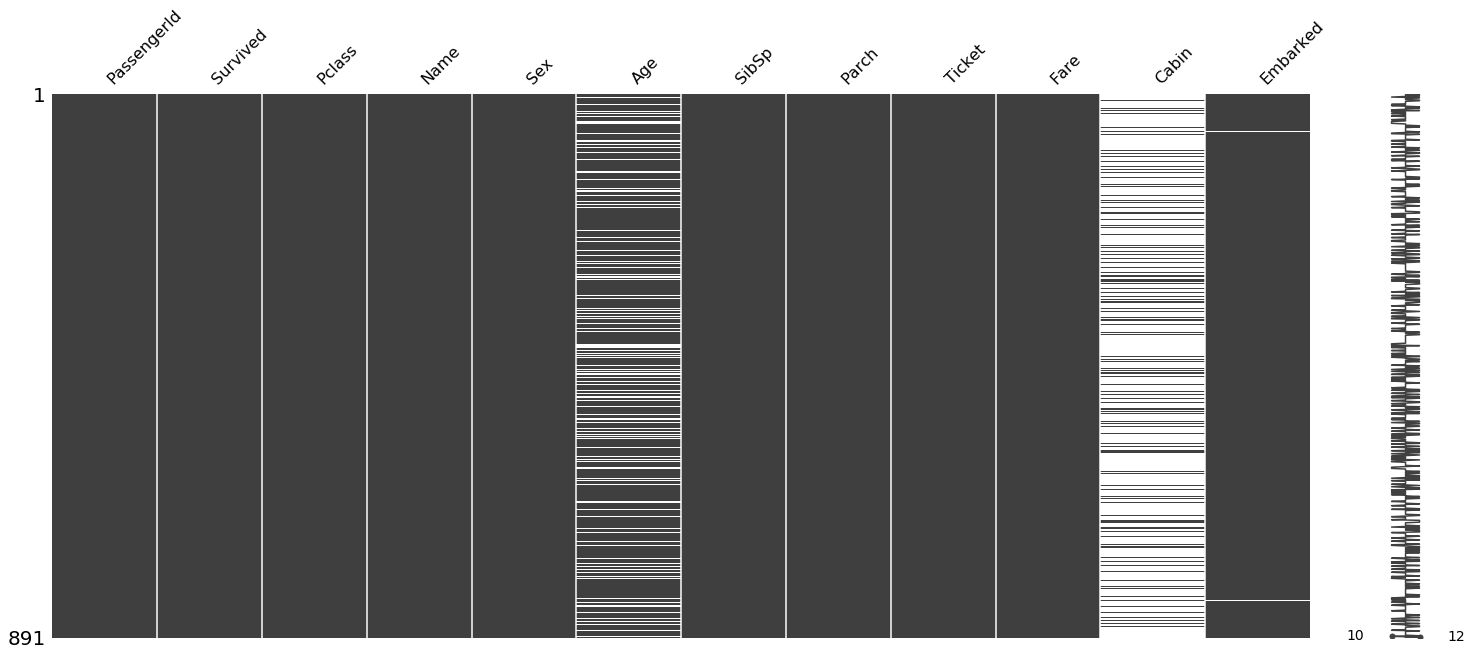

In [16]:
import missingno as msno
msno.matrix(df)

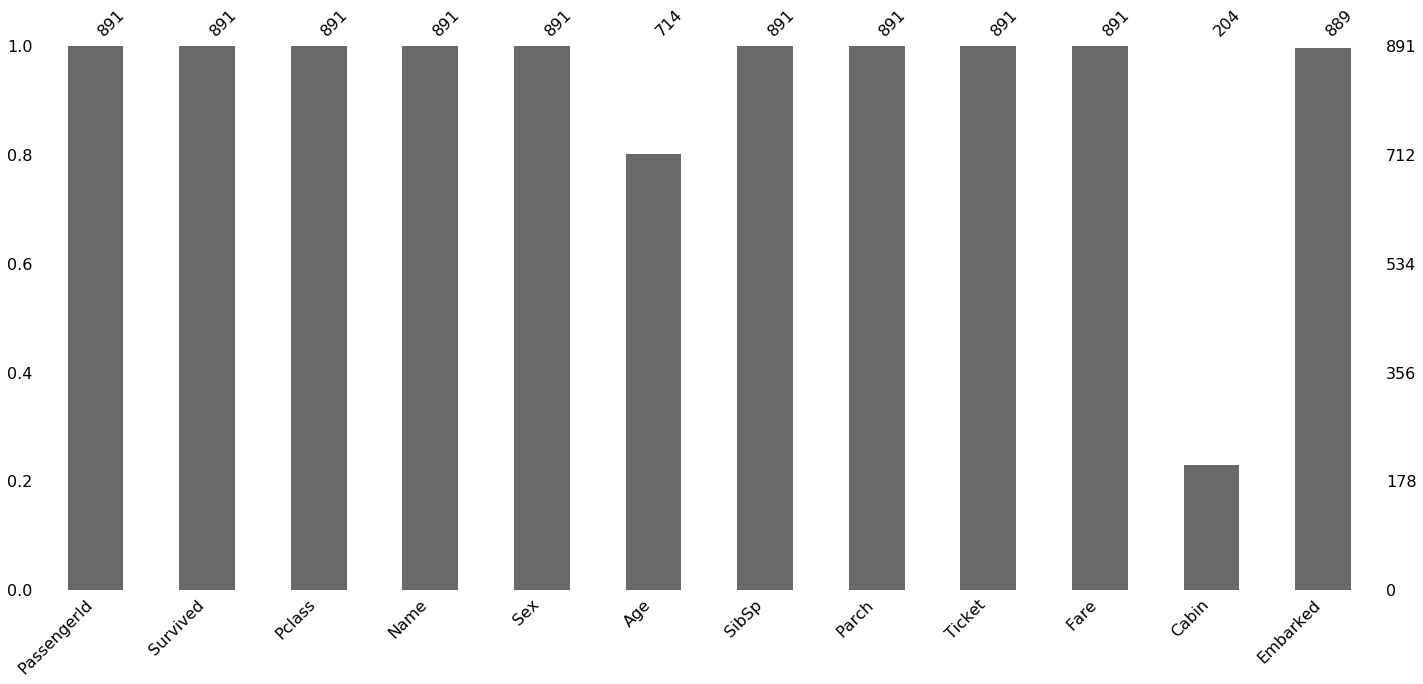

In [17]:
msno.bar(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EAD24E7E08>,
      dtype=object)

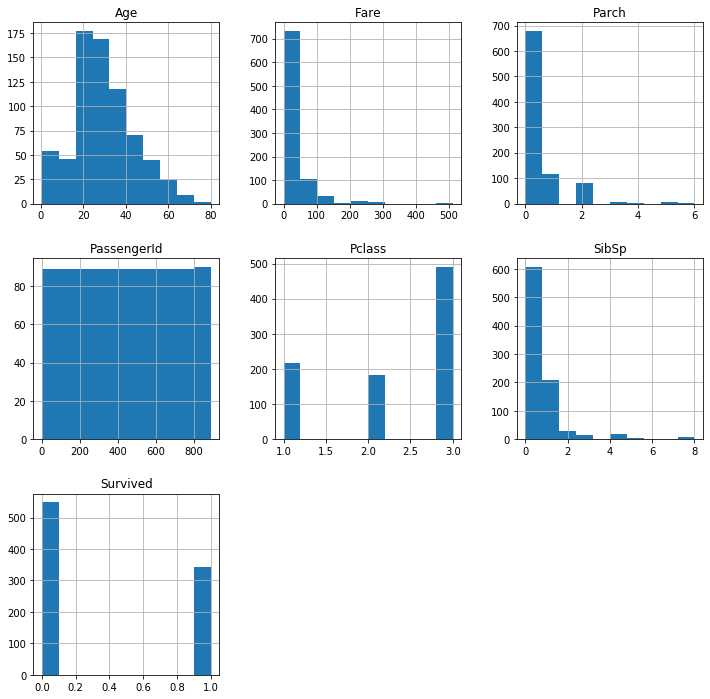

In [19]:
df.hist(figsize=(12,12))

In [20]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [21]:
df.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

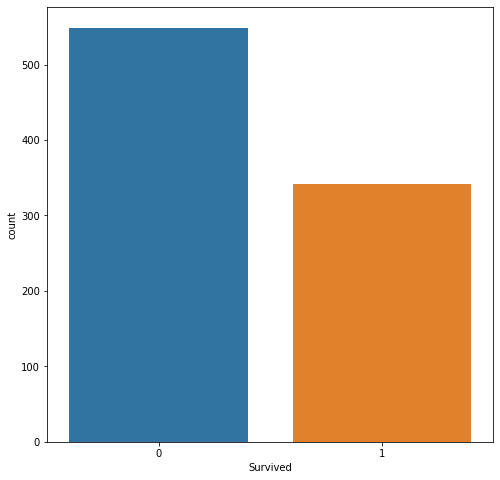

In [23]:
#visualizing the survived column
plt.figure(figsize=(8,8))
sns.countplot(df['Survived'])

Text(0.5, 1.0, 'percentage of survived and deceased')

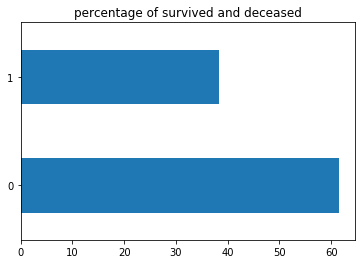

In [25]:
(df.Survived.value_counts(normalize=True)*100).plot.barh().set_title("percentage of survived and deceased")

##### by seeing the plot, we can observe that more than 60% of the people have been deceased and 38% of the people have been survived

In [26]:
#how many male and female passengers survived from this tragedy?  --> 0--deceased, 1--survived
df['Survived'][df['Sex']=='female'].value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [28]:
df['Survived'][df['Sex']=='male'].value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [ ]:
plt.style.available  #to check different styles available in matplotlib

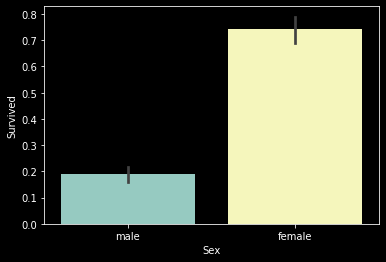

In [29]:
with plt.style.context('dark_background'):
    sns.barplot(x='Sex',y='Survived',data=df)

In [30]:
print("class1 survives",df['Survived'][df['Pclass']==1].value_counts(normalize=True))
print("class2 survived",df['Survived'][df['Pclass']==2].value_counts(normalize=True))
print("class3 survived",df['Survived'][df['Pclass']==3].value_counts(normalize=True))

class1 survives 1    0.62963
0    0.37037
Name: Survived, dtype: float64
class2 survived 0    0.527174
1    0.472826
Name: Survived, dtype: float64
class3 survived 0    0.757637
1    0.242363
Name: Survived, dtype: float64


C:\Users\lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


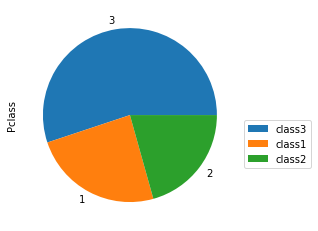

In [37]:
#plot of pclass:
df.Pclass.value_counts().plot.pie().legend(labels=['class3','class1','class2'],loc='top right',bbox_to_anchor=(1,0.5))

In [39]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

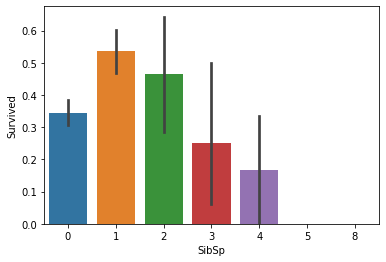

In [38]:
sns.barplot(x='SibSp',y='Survived',data=df)

In [40]:
##parch---> parent and child
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

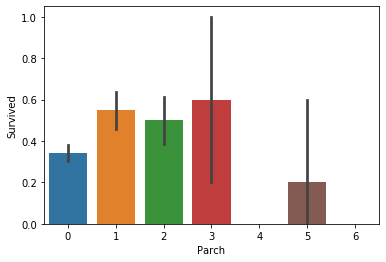

In [41]:
sns.barplot(x='Parch',y='Survived',data=df)

In [42]:
df.isnull().mean().sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

In [43]:
#grouping the ages of passengers
df['Age_range']=pd.cut(df.Age,[0,10,20,30,40,60,80])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30, 40]"


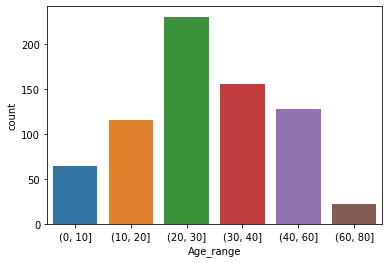

In [45]:
#visualizing the age group of passengers who are more likely to survive
sns.countplot(x="Age_range",data=df)

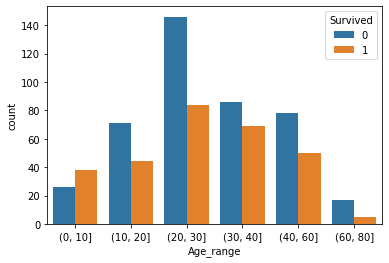

In [44]:
#visualizing the age group of passengers who are more likely to survive
sns.countplot(x="Age_range",hue='Survived',data=df)